<a href="https://colab.research.google.com/github/komalck/project/blob/master/Facial_emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

In [ ]:
uploaded=files.upload()

for fn in uploaded.keys():
  print('file"{name} with length{length} bytes'.format(name=fn,length=len(uploaded[fn])))

In [ ]:
from zipfile import ZipFile
file_name = "archive.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [ ]:
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = 'train'
val_dir = 'test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
emotion_model = Sequential()
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import legacy as optimizers

In [ ]:
optimizer = Adam(learning_rate=0.0001)

In [ ]:
emotion_model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
emotion_model_info = emotion_model.fit(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=60,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

Epoch 1/60
448/448 [==============================] - 32s 68ms/step - loss: 1.8043 - accuracy: 0.2588 - val_loss: 1.7317 - val_accuracy: 0.3175
Epoch 2/60
448/448 [==============================] - 29s 66ms/step - loss: 1.6487 - accuracy: 0.3532 - val_loss: 1.5689 - val_accuracy: 0.3956
Epoch 3/60
448/448 [==============================] - 30s 66ms/step - loss: 1.5514 - accuracy: 0.4036 - val_loss: 1.4887 - val_accuracy: 0.4302
Epoch 4/60
448/448 [==============================] - 30s 66ms/step - loss: 1.4753 - accuracy: 0.4353 - val_loss: 1.4313 - val_accuracy: 0.4554
Epoch 5/60
448/448 [==============================] - 30s 66ms/step - loss: 1.4194 - accuracy: 0.4559 - val_loss: 1.3747 - val_accuracy: 0.4799
Epoch 6/60
448/448 [==============================] - 29s 65ms/step - loss: 1.3636 - accuracy: 0.4806 - val_loss: 1.3378 - val_accuracy: 0.4982
Epoch 7/60
448/448 [==============================] - 29s 65ms/step - loss: 1.3196 - accuracy: 0.5005 - val_loss: 1.2965 - val_accuracy:

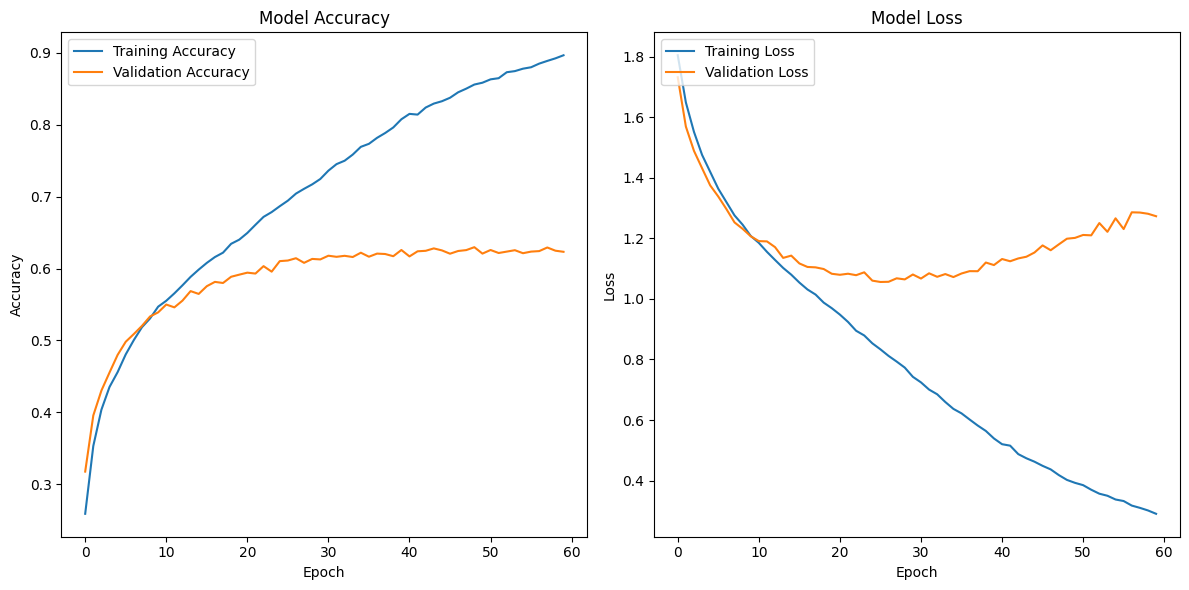

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(emotion_model_info.history['accuracy'], label='Training Accuracy')
plt.plot(emotion_model_info.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(emotion_model_info.history['loss'], label='Training Loss')
plt.plot(emotion_model_info.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
#Saving the model
emotion_model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
emotion_model.save('model.keras')

In [ ]:
from keras.models import load_model
emotion_model = load_model('/content/model.h5')

In [ ]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))

    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')

    plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def copy_photo(source_path='/content/drive/MyDrive/extracted_faces/face_60.jpg', dest_path='/content/photo.jpg'):
    shutil.copyfile(source_path, dest_path)
    return dest_path

if __name__ == '__main__':
    # Copy the provided image to the destination path
    source_image_path = '/content/drive/MyDrive/extracted_faces/face_60.jpg'
    dest_image_path = '/content/photo.jpg'
    copy_photo(source_path=source_image_path, dest_path=dest_image_path)

    # Load the image (assuming the face is already detected and cropped)
    file = dest_image_path
    true_image = image.load_img(file)
    img = image.load_img(file, color_mode="grayscale", target_size=(48, 48))

    # Preprocess the image for the model
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.0

    # Predict the emotion
    custom = emotion_model.predict(x)
    emotion_analysis(custom[0])  # Assuming this function plots or analyzes the output

    # Display the original image
    plt.imshow(true_image)
    plt.axis('off')
    plt.show()


NameError: name 'emotion_model' is not defined

OpenCV(4.10.0) /io/opencv/modules/objdetect/src/cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'

1/1 [==============================] - 0s 26ms/step


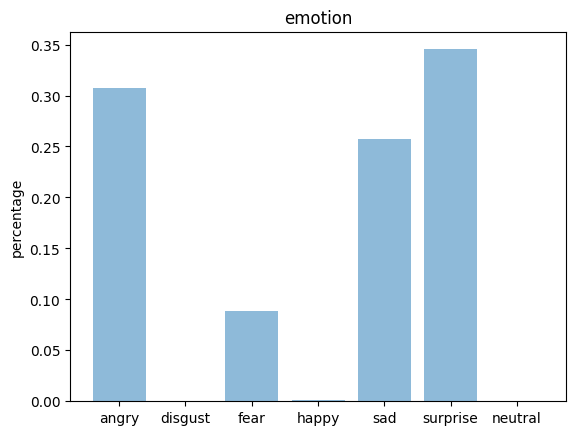

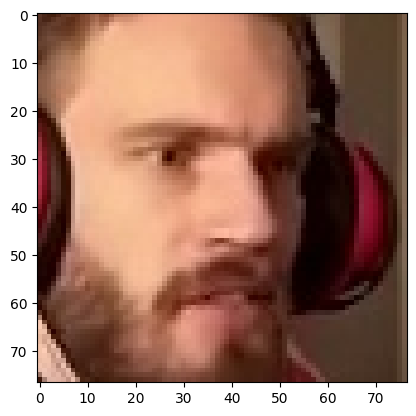

In [ ]:
import shutil
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2

def copy_photo(source_path='/content/drive/MyDrive/extracted_faces/face_3960.jpg', dest_path='/content/photo.jpg'):
    shutil.copyfile(source_path, dest_path)
    return dest_path

def facecrop(image_path):
    facedata = '/content/haarcascade_frontalface_alt.xml'
    cascade = cv2.CascadeClassifier(facedata)

    img = cv2.imread(image_path)

    try:
        minisize = (img.shape[1], img.shape[0])
        miniframe = cv2.resize(img, minisize)
        faces = cascade.detectMultiScale(miniframe)

        for f in faces:
            x, y, w, h = [v for v in f]
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            sub_face = img[y:y + h, x:x + w]
            cv2.imwrite('capture.jpg', sub_face)
            # print ("Writing: " + image)

    except Exception as e:
        print(e)

if __name__ == '__main__':
    # Copy the provided image to the destination path
    source_image_path = '/content/drive/MyDrive/extracted_faces/face_3960.jpg'
    dest_image_path = '/content/photo.jpg'
    copy_photo(source_path=source_image_path, dest_path=dest_image_path)

    # Perform face cropping on the copied image
    facecrop(dest_image_path)

    # Testing the file with your model
    file = dest_image_path
    true_image = image.load_img(file)
    img = image.load_img(file, color_mode="grayscale", target_size=(48, 48))

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255

    custom = emotion_model.predict(x)
    emotion_analysis(custom[0])

    x = np.array(x, 'float32')
    x = x.reshape([48, 48])

    plt.imshow(true_image)
    plt.show()


In [ ]:
#CODE for Capturing an image on Colab from here: https://colab.research.google.com/notebook#fileId=1OnUy6eFE7XhdfGfAHDCqQxpwueTOj_NO

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
take_photo()

<IPython.core.display.Javascript object>

'photo.jpg'

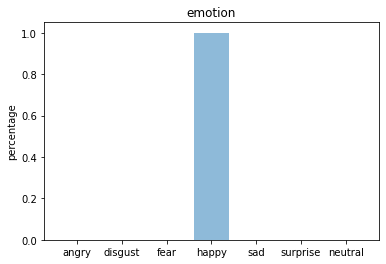

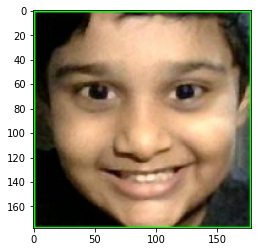

In [ ]:
import cv2

def facecrop(image):
    facedata = '/content/haarcascade_frontalface_alt.xml'
    cascade = cv2.CascadeClassifier(facedata)

    img = cv2.imread(image)

    try:

        minisize = (img.shape[1],img.shape[0])
        miniframe = cv2.resize(img, minisize)

        faces = cascade.detectMultiScale(miniframe)

        for f in faces:
            x, y, w, h = [ v for v in f ]
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

            sub_face = img[y:y+h, x:x+w]


            cv2.imwrite('capture.jpg', sub_face)
            #print ("Writing: " + image)

    except Exception as e:
        print (e)




if __name__ == '__main__':
    facecrop('/content/photo.jpg')

#Testing a file.

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


file = '/content/capture.jpg'
true_image = image.load_img(file)
img = image.load_img(file, color_mode="grayscale", target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = emotion_model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);


plt.imshow(true_image)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from keras.preprocessing import image
from keras.models import load_model

In [ ]:
# Load both models
audio_model = load_model('/content/cnn_model.h5')   # Load the audio emotion recognition model
facial_model = load_model('/content/model.h5')   # Load the facial emotion recognition model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
!pip install resampy

In [ ]:
# Preprocess audio file and extract MFCC features
def extract_mfcc(file_path, sr=22050, n_mfcc=40):
    y, sr = librosa.load(file_path, sr=sr, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfccs_mean = np.mean(mfccs.T, axis=0)
    return mfccs_mean


In [ ]:
# Preprocess image for facial recognition model
def preprocess_image(file_path):
    img = image.load_img(file_path, color_mode="grayscale", target_size=(48, 48))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.0
    return x

In [ ]:
# Function to plot the emotion probabilities (output)
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprised')
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Percentage')
    plt.title('Emotion Analysis')
    plt.show()

In [ ]:
# Main function to perform decision-level fusion
def decision_fusion(audio_file, image_file):
    # 1. Preprocess the audio and image inputs
    audio_features = extract_mfcc(audio_file)  # Extract MFCC features from the audio file
    audio_features_reshaped = np.expand_dims(audio_features, axis=0)
    audio_features_reshaped = np.expand_dims(audio_features_reshaped, axis=2)  # Add necessary dimensions for CNN input

    image_features = preprocess_image(image_file)  # Preprocess the image

    # 2. Get the predictions (probabilities) from both models
    audio_probs = audio_model.predict(audio_features_reshaped)[0]  # Audio model probabilities
    facial_probs = facial_model.predict(image_features)[0]  # Facial model probabilities

    # 3. Updated emotion mapping: combine 'neutral' and 'calm' as 'neutral'
    # Define the emotion labels
    emotion_labels = {
        1: 'neutral',  # Combines both neutral and calm as neutral
        3: 'happy',
        4: 'sad',
        5: 'angry',
        6: 'fearful',
        7: 'disgust',
        8: 'surprised'
    }

    # Adjust the audio prediction to map 'calm' (2) to 'neutral' (1)
    predicted_audio_class = np.argmax(audio_probs, axis=0)
    if predicted_audio_class == 2:  # If 'calm' is predicted, map it to 'neutral'
        predicted_audio_class = 1

    # Update the audio probabilities by merging 'calm' and 'neutral' into one
    audio_probs[1] += audio_probs[2]  # Add 'calm' (index 2) to 'neutral' (index 1)
    audio_probs = np.delete(audio_probs, 2)  # Remove 'calm' from the probabilities

    # 4. Decision-Level Fusion (weighted average)
    weight_audio = 0.6  # You can adjust these weights
    weight_facial = 0.4  # Based on model performance or importance

    # Combine the probabilities using weighted average
    combined_probs = (weight_audio * audio_probs) + (weight_facial * facial_probs)

    # 5. Get the final prediction (emotion with the highest combined probability)
    final_prediction_index = np.argmax(combined_probs)
    final_predicted_emotion = emotion_labels[final_prediction_index + 1]  # Adjust for label indexing

    # Print out the combined predictions
    print(f"Audio Model Probabilities (after fusion of neutral/calm): {audio_probs}")
    print(f"Facial Model Probabilities: {facial_probs}")
    print(f"Combined Probabilities: {combined_probs}")
    print(f"Final Predicted Emotion (Combined Model): {final_predicted_emotion}")

    # 6. Visualize the combined probabilities
    emotion_analysis(combined_probs)

In [ ]:
# Example Usage
audio_file_path = '/content/AUDIO_3_Segment_79_start=234000.mp3'  # Path to the audio file
image_file_path = '/content/face_3min_57sec_6frame.jpg'  # Path to the image fi

In [ ]:
# Perform decision-level fusion and predict the final emotion
decision_fusion(audio_file_path, image_file_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


KeyError: 2

In [ ]:
!pip install resampy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 39.2 MB/s eta 0:00:00


In [ ]:
!pip install librosa

In [ ]:
!pip install resampy librosa


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
Audio predicted emotion: happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


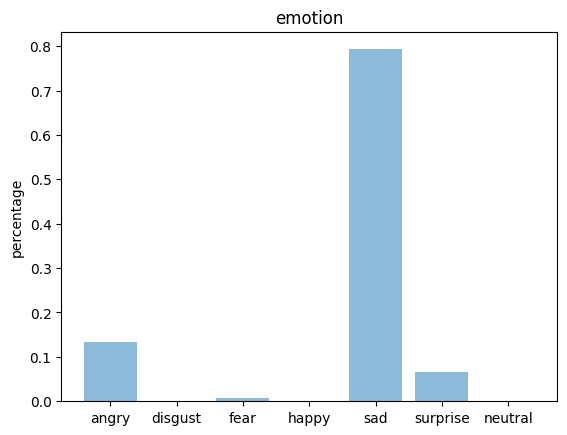

Facial predicted emotion: angry


ValueError: operands could not be broadcast together with shapes (8,) (7,) 

In [ ]:
import numpy as np
import librosa
import shutil
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import load_model

# Load both models
audio_model = load_model('cnn_model.h5')  # Assuming cnn_model.h5 is the audio model
facial_model = load_model('model.h5')     # Assuming model.h5 is the facial emotion model

# Audio feature extraction function (with combined 'neutral' and 'calm')
def extract_mfcc(file_path, sr=22050, n_mfcc=40):
    y, sr = librosa.load(file_path, sr=sr, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfccs_mean = np.mean(mfccs.T, axis=0)
    return mfccs_mean

# Copy photo helper function (for facial emotion recognition)
def copy_photo(source_path, dest_path='/content/photo.jpg'):
    shutil.copyfile(source_path, dest_path)
    return dest_path

# Visualization function for emotion prediction analysis
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    plt.show()

# Perform decision-level fusion
def decision_fusion(audio_file_path, image_file_path):
    # Step 1: Audio model prediction
    mfcc_features = extract_mfcc(audio_file_path)
    mfcc_features_reshaped = np.expand_dims(mfcc_features, axis=0)
    mfcc_features_reshaped = np.expand_dims(mfcc_features_reshaped, axis=2)

    audio_prediction = audio_model.predict(mfcc_features_reshaped)
    predicted_class_audio = np.argmax(audio_prediction, axis=1)

    # Updated emotion mapping (combine 'neutral' and 'calm')
    emotion_labels = {
        1: 'neutral',
        3: 'happy',
        4: 'sad',
        5: 'angry',
        6: 'fearful',
        7: 'disgust',
        8: 'surprised'
    }

    predicted_emotion_audio = predicted_class_audio[0] + 1
    if predicted_emotion_audio == 2:  # Map 'calm' to 'neutral'
        predicted_emotion_audio = 1

    print(f'Audio predicted emotion: {emotion_labels[predicted_emotion_audio]}')

    # Step 2: Facial model prediction
    copy_photo(source_path=image_file_path)
    file = '/content/photo.jpg'
    img = image.load_img(file, color_mode="grayscale", target_size=(48, 48))

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.0

    facial_prediction = facial_model.predict(x)
    emotion_analysis(facial_prediction[0])
    predicted_class_facial = np.argmax(facial_prediction, axis=1)[0]

    print(f'Facial predicted emotion: {emotion_labels[predicted_class_facial+1]}')

    # Step 3: Decision-level fusion using weighted average
    weight_audio = 0.6
    weight_facial = 0.4

    combined_probs = weight_audio * audio_prediction[0] + weight_facial * facial_prediction[0]
    final_predicted_class = np.argmax(combined_probs)
    final_predicted_emotion = emotion_labels[final_predicted_class + 1]

    print(f'Final predicted emotion (fusion): {final_predicted_emotion}')

# Specify the paths to the audio and image files
audio_file_path = '/content/AUDIO_3_Segment_79_start=234000.mp3'
image_file_path = '/content/face_3min_57sec_6frame.jpg'

# Perform decision-level fusion and predict the final emotion
decision_fusion(audio_file_path, image_file_path)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[[-3.4601666e+02 -3.2823465e+02 -3.7726157e+02 ... -3.0138971e+02
  -3.0547571e+02 -3.0397256e+02]
 [ 8.1860046e+01  8.5504677e+01  9.1521698e+01 ...  4.8664650e+01
   6.2937881e+01  7.2215118e+01]
 [-7.2100357e+01 -6.6357712e+01 -4.7260349e+01 ... -9.3443832e+01
  -6.4649422e+01 -3.3529305e+01]
 ...
 [-6.5040054e+00 -8.0613394e+00 -9.7707281e+00 ...  6.4598246e+00
   7.6744163e-01 -1.4532197e+00]
 [-2.2515845e+00 -2.8876073e+00 -3.1072302e+00 ... -5.7561073e+00
  -5.2308750e+00  8.1082374e-02]
 [-4.6496563e+00 -1.6860896e+00  4.0296321e+00 ... -6.4339361e+00
  -6.3955855e+00 -1.1785855e+00]]
[-4.1392838e+02  4.3215229e+01 -5.3537579e+01  5.8899050e+00
 -9.7733955e+00 -6.3604598e+00 -2.3461460e+01 -1.5658211e+01
 -1.1661738e+01 -8.5093765e+00 -1.9653114e+01 -5.3980393e+00
 -1.8839603e+01  4.0635353e-01 -1.0775606e+01 -3.6881604e+00
 -1.0951635e+01  1.9039941e-01 -6.2251258e+00  2.3133180e+00
  1.1424593e+00  4.6068959e+00 -2.6956637e+00  9.3584824e+00
 -1.1341320e+00  4.6332555e+00  3.

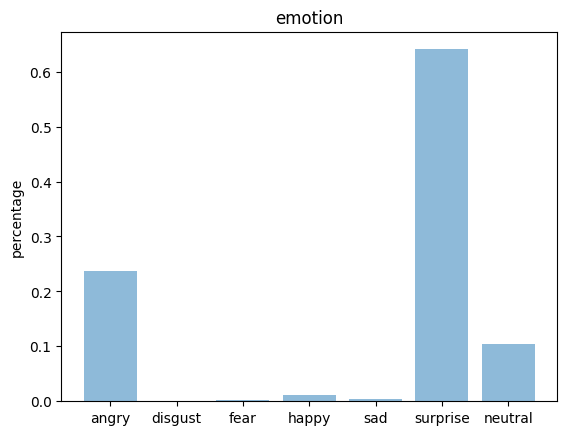

Facial predicted emotion: surprise
Shape mismatch: audio (1, 8), facial (1, 7)
0.703511
Final predicted emotion (fusion): surprise


In [ ]:
import numpy as np
import librosa
import shutil
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import load_model

# Load both models
audio_model = load_model('/content/cnn_model.h5')  # Assuming cnn_model.h5 is the audio model
facial_model = load_model('/content/model.h5')     # Assuming model.h5 is the facial emotion model

# Audio feature extraction function (with combined 'neutral' and 'calm')
def extract_mfcc(file_path, sr=22050, n_mfcc=40):
    y, sr = librosa.load(file_path, sr=sr, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    print(mfccs)
    mfccs_mean = np.mean(mfccs.T, axis=0)
    print(mfccs_mean)
    return mfccs_mean

# Copy photo helper function (for facial emotion recognition)
def copy_photo(source_path, dest_path='/content/photo.jpg'):
    shutil.copyfile(source_path, dest_path)
    return dest_path

# Visualization function for emotion prediction analysis
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    plt.show()

# Perform decision-level fusion
def decision_fusion(audio_file_path, image_file_path):
    # Step 1: Audio model prediction
    mfcc_features = extract_mfcc(audio_file_path)
    mfcc_features_reshaped = np.expand_dims(mfcc_features, axis=0)
    mfcc_features_reshaped = np.expand_dims(mfcc_features_reshaped, axis=2)

    audio_prediction = audio_model.predict(mfcc_features_reshaped)
    predicted_class_audio = np.argmax(audio_prediction, axis=1)

    # Updated unified emotion mapping (aligning both audio and facial models to specified order)
    emotion_labels = {
        0: 'angry',       # 0
        1: 'disgust',     # 1
        2: 'fear',        # 2
        3: 'happy',       # 3
        4: 'sad',         # 4
        5: 'surprise',    # 5
        6: 'neutral'      # 6 (includes both 'neutral' and 'calm')
    }

    predicted_emotion_audio = predicted_class_audio[0]
    if predicted_emotion_audio == 2:  # Map 'calm' to 'neutral'
        predicted_emotion_audio = 6

    print(f'Audio predicted emotion: {emotion_labels[predicted_emotion_audio]}')

    # Step 2: Facial model prediction
    copy_photo(source_path=image_file_path)
    file = '/content/photo.jpg'
    img = image.load_img(file, color_mode="grayscale", target_size=(48, 48))

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.0

    facial_prediction = facial_model.predict(x)
    emotion_analysis(facial_prediction[0])
    predicted_class_facial = np.argmax(facial_prediction, axis=1)[0]

    print(f'Facial predicted emotion: {emotion_labels[predicted_class_facial]}')

    # Step 3: Decision-level fusion using weighted average
    # Check and ensure both predictions have the same shape
    if audio_prediction.shape != facial_prediction.shape:
        print(f"Shape mismatch: audio {audio_prediction.shape}, facial {facial_prediction.shape}")
        # Optionally, resize or pad the smaller prediction
        min_len = min(audio_prediction.shape[1], facial_prediction.shape[1])
        audio_prediction = audio_prediction[:, :min_len]
        facial_prediction = facial_prediction[:, :min_len]

    weight_audio = 0.3
    weight_facial = 0.7

    combined_probs = weight_audio * audio_prediction[0] + weight_facial * facial_prediction[0]
    print(max(combined_probs))

    final_predicted_class = np.argmax(combined_probs)
    final_predicted_emotion = emotion_labels[final_predicted_class]

    print(f'Final predicted emotion (fusion): {final_predicted_emotion}')

# Specify the paths to the audio and image files
audio_file_path = '/content/AUDIO_Segment_43_start=126.0.mp3'
image_file_path = '/content/face_18min_19sec_48frame.jpg'

# Perform decision-level fusion and predict the final emotion
decision_fusion(audio_file_path, image_file_path)


In [ ]:
#Testing Audio Only

import numpy as np
import librosa
import shutil
import matplotlib.pyplot as plt

# Load both models
audio_model = load_model('/content/cnn_model.h5')  # Assuming cnn_model.h5 is the audio model
# facial_model = load_model('/content/model.h5')     # Assuming model.h5 is the facial emotion model

def extract_mfcc(file_path, sr=22050, n_mfcc=40):
    y, sr = librosa.load(file_path, sr=sr, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    print(mfccs)
    mfccs_mean = np.mean(mfccs.T, axis=0)
    print(mfccs_mean)
    return mfccs_mean

def decision_audio(audio_file_path):
    # Step 1: Audio model prediction
    mfcc_features = extract_mfcc(audio_file_path)
    mfcc_features_reshaped = np.expand_dims(mfcc_features, axis=0)
    mfcc_features_reshaped = np.expand_dims(mfcc_features_reshaped, axis=2)

    audio_prediction = audio_model.predict(mfcc_features_reshaped)
    predicted_class_audio = np.argmax(audio_prediction, axis=1)

    # Updated unified emotion mapping (aligning both audio and facial models to specified order)
    emotion_labels = {
        0: 'angry',       # 0
        1: 'disgust',     # 1
        2: 'fear',        # 2
        3: 'happy',       # 3
        4: 'sad',         # 4
        5: 'surprise',    # 5
        6: 'neutral'      # 6 (includes both 'neutral' and 'calm')
    }

    predicted_emotion_audio = predicted_class_audio[0]
    if predicted_emotion_audio == 2:  # Map 'calm' to 'neutral'
        predicted_emotion_audio = 6

    print(f'Audio predicted emotion: {emotion_labels[predicted_emotion_audio]}')

    # Step 2: Facial model prediction
    # copy_photo(source_path=image_file_path)
    # file = '/content/photo.jpg'
    # img = image.load_img(file, color_mode="grayscale", target_size=(48, 48))

    # x = image.img_to_array(img)
    # x = np.expand_dims(x, axis=0)
    # x /= 255.0

    # facial_prediction = facial_model.predict(x)
    # emotion_analysis(facial_prediction[0])
    # predicted_class_facial = np.argmax(facial_prediction, axis=1)[0]

    # print(f'Facial predicted emotion: {emotion_labels[predicted_class_facial]}')

    # Step 3: Decision-level fusion using weighted average
    # Check and ensure both predictions have the same shape
    # if audio_prediction.shape != facial_prediction.shape:
    #     print(f"Shape mismatch: audio {audio_prediction.shape}, facial {facial_prediction.shape}")
    #     # Optionally, resize or pad the smaller prediction
    #     min_len = min(audio_prediction.shape[1], facial_prediction.shape[1])
    #     audio_prediction = audio_prediction[:, :min_len]
    #     facial_prediction = facial_prediction[:, :min_len]

    # weight_audio = 0.3
    # weight_facial = 0.7

    # combined_probs = weight_audio * audio_prediction[0] + weight_facial * facial_prediction[0]
    # print(max(combined_probs))

    final_predicted_class = np.argmax(audio_prediction[0])
    final_predicted_emotion = emotion_labels[final_predicted_class]

    print(f'Final predicted emotion (Audio): {final_predicted_emotion}')

# Specify the paths to the audio and image files
audio_file_path = '/content/AUDIO_Segment_79_start=234.0.mp3'
# image_file_path = '/content/face_18min_19sec_48frame.jpg'

# Perform decision-level fusion and predict the final emotion
decision_audio(audio_file_path)

[[-208.24522    -228.33987    -286.27612    ... -339.21933
  -309.82712    -258.2428    ]
 [ 118.53603     124.75474     100.34262    ...   94.101364
   117.780914    115.971924  ]
 [ -38.18732     -40.003433    -32.332565   ...  -30.060966
     4.823841     14.257301  ]
 ...
 [  -5.3363743    -6.289321     -3.4312463  ...    5.5348177
    -3.3833244    -5.81872   ]
 [   2.3963692    -0.43535054   -3.9946136  ...  -12.77894
   -12.449806     -6.539982  ]
 [  -2.5141938    -5.605845     -1.6960025  ...  -13.881322
   -12.750343     -6.600618  ]]
[-2.9474847e+02  4.8966160e+01 -4.2616234e+01  9.6968861e+00
 -3.0048054e+01 -1.7599409e+01 -2.5377308e+01 -1.5284644e+01
 -3.5140495e+01 -6.5289497e+00 -3.5248264e+01 -6.8111215e+00
 -2.2625364e+01 -4.1312413e+00 -1.1901616e+01 -8.1839199e+00
 -9.2006655e+00  2.5955472e+00 -6.2117519e+00  2.9288204e+00
 -8.9732867e-01  8.8918533e+00  9.1688079e-01  1.1599295e+01
 -3.3033214e+00  5.2727838e+00  1.5193782e+00  7.8328997e-01
  2.7309279e+00  4.693

In [ ]:
# Import necessary libraries
import numpy as np
import librosa
import shutil
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import load_model
import os
import glob

# Load both models
audio_model = load_model('/content/cnn_model.h5')  # Audio model
facial_model = load_model('/content/model.h5')     # Facial emotion model

# Audio feature extraction function (with combined 'neutral' and 'calm')
def extract_mfcc(file_path, sr=22050, n_mfcc=40):
    y, sr = librosa.load(file_path, sr=sr, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfccs_mean = np.mean(mfccs.T, axis=0)
    return mfccs_mean

# Copy photo helper function (for facial emotion recognition)
def copy_photo(source_path, dest_path='/content/photo.jpg'):
    shutil.copyfile(source_path, dest_path)
    return dest_path

# Function to check if the audio contains speech or silence
def is_speech_in_audio(file_path, threshold=0.005):
    # Load the audio file
    y, sr = librosa.load(file_path, sr=None)

    # Calculate the Root Mean Square Energy (RMSE) of the audio
    rmse = librosa.feature.rms(y=y)[0]

    # Calculate the mean RMSE (energy level)
    mean_rmse = np.mean(rmse)

    # If the mean RMSE exceeds the threshold, we consider it as speech
    return mean_rmse > threshold

# Visualization function for emotion prediction analysis
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    plt.show()

# Perform decision-level fusion
def decision_fusion(audio_file_path, image_file_path):
    # Audio model prediction
    mfcc_features = extract_mfcc(audio_file_path)
    mfcc_features_reshaped = np.expand_dims(np.expand_dims(mfcc_features, axis=0), axis=2)
    audio_prediction = audio_model.predict(mfcc_features_reshaped)

    # Map 'calm' to 'neutral'
    emotion_labels = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'sad', 5: 'surprise', 6: 'neutral'}
    predicted_emotion_audio = np.argmax(audio_prediction)
    if predicted_emotion_audio == 2:
        predicted_emotion_audio = 6

    # Facial model prediction
    copy_photo(source_path=image_file_path)
    img = image.load_img('/content/photo.jpg', color_mode="grayscale", target_size=(48, 48))
    x = np.expand_dims(image.img_to_array(img) / 255.0, axis=0)
    facial_prediction = facial_model.predict(x)

    # Check and ensure both predictions have the same shape
    if audio_prediction.shape != facial_prediction.shape:
        print(f"Shape mismatch: audio {audio_prediction.shape}, facial {facial_prediction.shape}")

        # Resize or trim to match the smaller size
        min_len = min(audio_prediction.shape[1], facial_prediction.shape[1])
        audio_prediction = audio_prediction[:, :min_len]
        facial_prediction = facial_prediction[:, :min_len]

    # Decision-level fusion
    weight_audio, weight_facial = (0.4, 0.6) if is_speech_in_audio(audio_file_path) else (0.0, 1.0)
    combined_probs = weight_audio * audio_prediction[0] + weight_facial * facial_prediction[0]
    final_predicted_class = np.argmax(combined_probs)
    return emotion_labels[final_predicted_class]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
# Plot emotion predictions over time
def plot_emotions_over_time(audio_clips, image_frames_by_segment):
    emotion_over_time = []

    for audio_clip, image_frames in zip(audio_clips, image_frames_by_segment):
        # Perform decision-level fusion for the 3-second segment
        predicted_emotion = decision_fusion(audio_clip, image_frames[0])

        # Append the predicted emotion for the current time segment
        emotion_over_time.append(predicted_emotion)

    # Mapping emotions to y-axis labels for plotting
    emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    emotion_to_index = {label: idx for idx, label in enumerate(emotion_labels)}

    # Convert emotions to their corresponding index for plotting
    emotion_indices = [emotion_to_index[emotion] for emotion in emotion_over_time]

    # Set figure size and larger fonts for readability
    plt.figure(figsize=(12, 8))  # Increase figure size for better visibility

    # Plotting the emotions over time with larger markers and thicker lines
    time_intervals = range(len(emotion_over_time))
    plt.plot(time_intervals, emotion_indices, marker='o', markersize=10, linestyle='-', linewidth=2, color='b')

    # Set x-axis and y-axis labels with larger fonts
    plt.xlabel('Time (3-second intervals)', fontsize=14)
    plt.ylabel('Predicted Emotion', fontsize=14)

    # Set y-ticks to display emotion labels with larger fonts
    plt.yticks(ticks=list(emotion_to_index.values()), labels=emotion_labels, fontsize=12)

    # Set the title with a larger font size
    plt.title('Emotions Over Time Based on Decision-Level Fusion', fontsize=16)

    # Add grid with customized line properties
    plt.grid(True, linestyle='--', linewidth=0.7)

    # Increase the space between tick labels and the axis for better readability
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)

    # Show the plot
    plt.show()

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_emotions_heatmap(audio_clips, image_frames_by_segment):
    # Initialize an array to hold emotion counts over time
    emotion_counts = np.zeros((7, len(audio_clips)))  # 7 emotions, number of segments

    for segment_idx, (audio_clip, image_frames) in enumerate(zip(audio_clips, image_frames_by_segment)):
        # Perform decision-level fusion for the current segment
        predicted_emotion = decision_fusion(audio_clip, image_frames[0])

        # Map predicted emotion to index
        emotion_index = emotion_to_index[predicted_emotion]

        # Increment the count for the predicted emotion
        emotion_counts[emotion_index, segment_idx] += 1

    # Set up the heatmap with the emotion counts
    plt.figure(figsize=(12, 8))
    sns.heatmap(emotion_counts, annot=True, fmt=".0f", cmap="YlGnBu", cbar=True,
                xticklabels=[f'Segment {i+1}' for i in range(len(audio_clips))],
                yticklabels=emotion_labels)

    # Set axis labels and title
    plt.xlabel('Audio Segments', fontsize=14)
    plt.ylabel('Predicted Emotions', fontsize=14)
    plt.title('Heatmap of Emotions Over Time Based on Decision-Level Fusion', fontsize=16)

    # Show the heatmap
    plt.show()

# Ensure to define emotion_labels and emotion_to_index as in the original code
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
emotion_to_index = {label: idx for idx, label in enumerate(emotion_labels)}


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_emotions_bubble_chart(audio_clips, image_frames_by_segment):
    # Initialize an array to hold emotion counts over time
    emotion_counts = np.zeros((len(emotion_labels), len(audio_clips)))  # 7 emotions, number of segments

    for segment_idx, (audio_clip, image_frames) in enumerate(zip(audio_clips, image_frames_by_segment)):
        # Perform decision-level fusion for the current segment
        predicted_emotion = decision_fusion(audio_clip, image_frames[0])

        # Map predicted emotion to index
        emotion_index = emotion_to_index[predicted_emotion]

        # Increment the count for the predicted emotion
        emotion_counts[emotion_index, segment_idx] += 1

    # Set up the bubble chart
    plt.figure(figsize=(12, 8))
    segments = range(len(audio_clips))

    # Create bubble chart
    for i in range(len(emotion_labels)):
        plt.scatter(segments, np.full(len(segments), i),
                    s=emotion_counts[i] * 100,  # Bubble size
                    alpha=0.6, label=emotion_labels[i])  # Adjust alpha for transparency

    # Set axis labels and title
    plt.xlabel('Audio Segments', fontsize=14)
    plt.yticks(ticks=range(len(emotion_labels)), labels=emotion_labels, fontsize=12)
    plt.title('Bubble Chart of Emotions Over Time Based on Decision-Level Fusion', fontsize=16)

    # Show the bubble chart
    plt.legend(title='Emotions', fontsize=12)
    plt.tight_layout()
    plt.show()

# Ensure to define emotion_labels and emotion_to_index as in the original code
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
emotion_to_index = {label: idx for idx, label in enumerate(emotion_labels)}


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_emotions_stacked_bar(audio_clips, image_frames_by_segment):
    # Initialize an array to hold emotion counts over time
    emotion_counts = np.zeros((len(emotion_labels), len(audio_clips)))  # 7 emotions, number of segments

    for segment_idx, (audio_clip, image_frames) in enumerate(zip(audio_clips, image_frames_by_segment)):
        # Perform decision-level fusion for the current segment
        predicted_emotion = decision_fusion(audio_clip, image_frames[0])

        # Map predicted emotion to index
        emotion_index = emotion_to_index[predicted_emotion]

        # Increment the count for the predicted emotion
        emotion_counts[emotion_index, segment_idx] += 1

    # Set up the stacked bar chart
    plt.figure(figsize=(12, 8))
    bar_width = 0.4
    segments = range(len(audio_clips))

    # Create the stacked bar segments
    for i in range(len(emotion_labels)):
        plt.bar(segments, emotion_counts[i], bottom=np.sum(emotion_counts[:i], axis=0),
                label=emotion_labels[i], width=bar_width)

    # Set axis labels and title
    plt.xlabel('Audio Segments', fontsize=14)
    plt.ylabel('Emotion Counts', fontsize=14)
    plt.title('Stacked Bar Chart of Emotions Over Time Based on Decision-Level Fusion', fontsize=16)
    plt.xticks(segments, [f'Segment {i+1}' for i in segments], fontsize=12)
    plt.legend(title='Emotions', fontsize=12)

    # Show the stacked bar chart
    plt.tight_layout()
    plt.show()

# Ensure to define emotion_labels and emotion_to_index as in the original code
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
emotion_to_index = {label: idx for idx, label in enumerate(emotion_labels)}


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
0.4
0.6
Final predicted emotion (fusion): neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
0.4
0.6
Final predicted emotion (fusion): happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
0.4
0.6
Final predicted emotion (fusion): disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
0.4
0.6
Final predicted emotion (fusion): sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
0.0
1.0
Final predicted emotion (fusion): angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
0.4
0.6
Final predicted emotion (fus

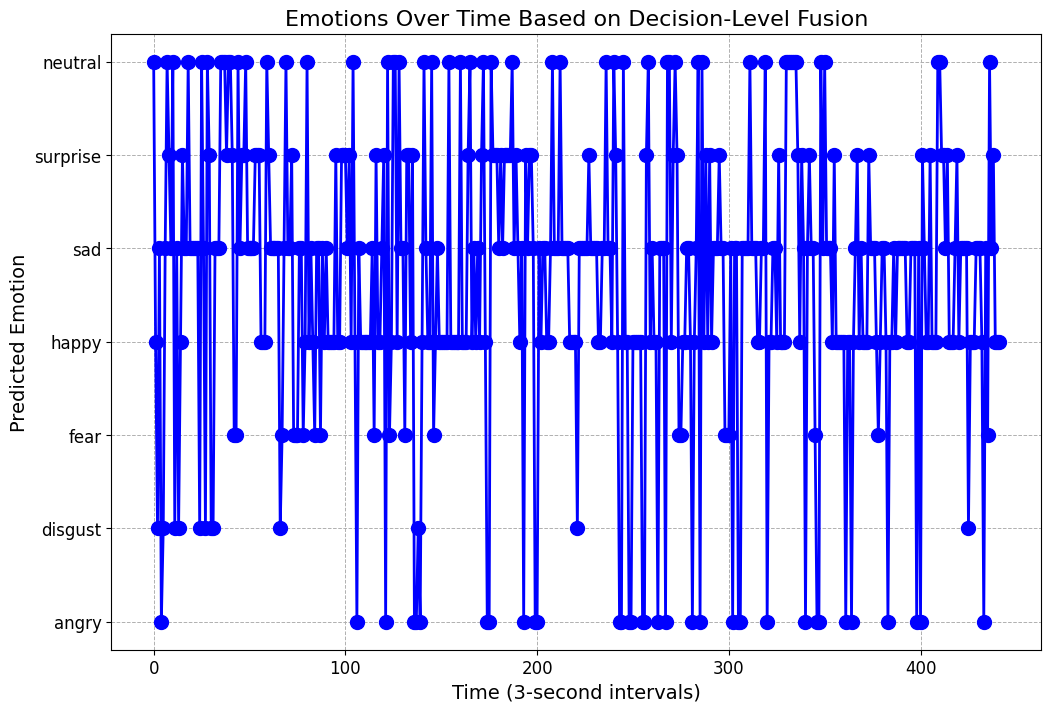

In [ ]:
# Automatically load audio clips and image frames from directories
def load_and_run_model():
    # Path to the directories containing audio clips and image frames
    audio_dir = '/content/drive/MyDrive/EditedAudioDataset'
    image_dir = '/content/drive/MyDrive/Streamer3_Faces (1)'

    # List all audio clips and sort them
    audio_clips = sorted(glob.glob(os.path.join(audio_dir, '*.mp3')))

    # List all image frames and sort them
    all_image_frames = sorted(glob.glob(os.path.join(image_dir, '*.jpg')))

    # Group image frames by segment (e.g., 1 frame per second for 3-second segment)
    frames_per_segment = 3
    image_frames_by_segment = [all_image_frames[i:i+frames_per_segment] for i in range(0, len(all_image_frames), frames_per_segment)]

    # Plot emotions over time using the model predictions
    plot_emotions_over_time(audio_clips, image_frames_by_segment)
   # plot_emotions_with_max_probability(audio_clips, image_frames_by_segment)

    #plot_emotions_heatmap(audio_clips, image_frames_by_segment)
    #plot_emotions_bubble_chart(audio_clips, image_frames_by_segment)
    #plot_emotions_stacked_bar(audio_clips, image_frames_by_segment)

# Run the function to load data and generate predictions
load_and_run_model()

TESTING FOR DECISION FUSION


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Audio prediction probabilities:
Audio predicted emotion: surprise
Audio predicted emotion probabity: [[1.5872082e-38 4.1712343e-17 1.4986107e-01 6.3481143e-15 1.5846061e-09
  8.5013890e-01 1.0175286e-17 2.4036489e-10]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
Facial prediction probabilities:


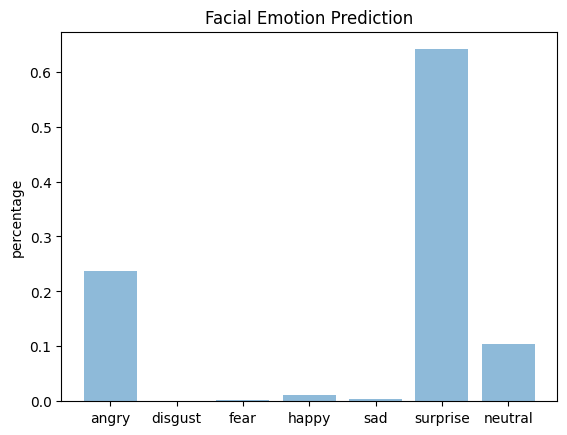

Facial predicted emotion: surprise
Shape mismatch: audio (1, 8), facial (1, 7)
Fusion prediction probabilities:


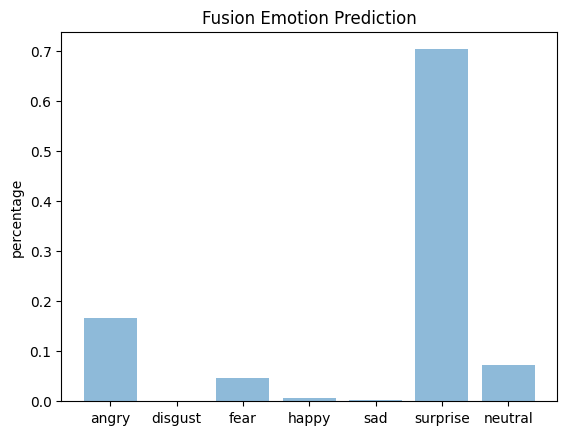

Final predicted emotion (fusion): surprise


In [ ]:
import numpy as np
import librosa
import shutil
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import load_model

# Load both models
audio_model = load_model('/content/cnn_model.h5')  # Assuming cnn_model.h5 is the audio model
facial_model = load_model('/content/model.h5')     # Assuming model.h5 is the facial emotion model

# Audio feature extraction function (with combined 'neutral' and 'calm')
def extract_mfcc(file_path, sr=22050, n_mfcc=40):
    y, sr = librosa.load(file_path, sr=sr, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfccs_mean = np.mean(mfccs.T, axis=0)
    return mfccs_mean

# Copy photo helper function (for facial emotion recognition)
def copy_photo(source_path, dest_path='/content/photo.jpg'):
    shutil.copyfile(source_path, dest_path)
    return dest_path

# Visualization function for emotion prediction analysis
def emotion_analysis(emotions, title='Emotion Prediction'):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title(title)
    plt.show()

def emotion_analysis_2(emotions, title='Emotion Prediction'):
    objects = ('neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised')
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title(title)
    plt.show()

# Perform decision-level fusion
def decision_fusion(audio_file_path, image_file_path):
    # Step 1: Audio model prediction
    mfcc_features = extract_mfcc(audio_file_path)
    mfcc_features_reshaped = np.expand_dims(mfcc_features, axis=0)
    mfcc_features_reshaped = np.expand_dims(mfcc_features_reshaped, axis=2)

    audio_prediction = audio_model.predict(mfcc_features_reshaped)

    # Visualize audio prediction
    print("Audio prediction probabilities:")
    # emotion_analysis_2(audio_prediction[0], title='Audio Emotion Prediction')

    predicted_class_audio = np.argmax(audio_prediction, axis=1)

    # Updated unified emotion mapping (aligning both audio and facial models to specified order)
    emotion_labels = {
        0: 'angry',       # 0
        1: 'disgust',     # 1
        2: 'fear',        # 2
        3: 'happy',       # 3
        4: 'sad',         # 4
        5: 'surprise',    # 5
        6: 'neutral'      # 6 (includes both 'neutral' and 'calm')
    }

    predicted_emotion_audio = predicted_class_audio[0]
    if predicted_emotion_audio == 2:  # Map 'calm' to 'neutral'
        predicted_emotion_audio = 6

    print(f'Audio predicted emotion: {emotion_labels[predicted_emotion_audio]}')
    print(f'Audio predicted emotion probabity: {audio_prediction}')

    # Step 2: Facial model prediction
    copy_photo(source_path=image_file_path)
    file = '/content/photo.jpg'
    img = image.load_img(file, color_mode="grayscale", target_size=(48, 48))

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.0

    facial_prediction = facial_model.predict(x)

    # Visualize facial prediction
    print("Facial prediction probabilities:")
    emotion_analysis(facial_prediction[0], title='Facial Emotion Prediction')

    predicted_class_facial = np.argmax(facial_prediction, axis=1)[0]

    print(f'Facial predicted emotion: {emotion_labels[predicted_class_facial]}')

    # Step 3: Decision-level fusion using weighted average
    # Check and ensure both predictions have the same shape
    if audio_prediction.shape != facial_prediction.shape:
        print(f"Shape mismatch: audio {audio_prediction.shape}, facial {facial_prediction.shape}")
        # Optionally, resize or pad the smaller prediction
        min_len = min(audio_prediction.shape[1], facial_prediction.shape[1])
        audio_prediction = audio_prediction[:, :min_len]
        facial_prediction = facial_prediction[:, :min_len]

    weight_audio = 0.3
    weight_facial = 0.7

    combined_probs = weight_audio * audio_prediction[0] + weight_facial * facial_prediction[0]

    # Visualize fusion prediction
    print("Fusion prediction probabilities:")
    emotion_analysis(combined_probs, title='Fusion Emotion Prediction')

    final_predicted_class = np.argmax(combined_probs)
    final_predicted_emotion = emotion_labels[final_predicted_class]

    print(f'Final predicted emotion (fusion): {final_predicted_emotion}')

# Specify the paths to the audio and image files
audio_file_path = '/content/AUDIO_Segment_43_start=126.0.mp3'
image_file_path = '/content/face_18min_19sec_48frame.jpg'

# Perform decision-level fusion and predict the final emotion
decision_fusion(audio_file_path, image_file_path)


multiple streamer

In [ ]:
import numpy as np
import librosa
import shutil
import os
import glob
import plotly.graph_objects as go
from keras.preprocessing import image
from keras.models import load_model

# Load both models
audio_model = load_model('/content/cnn_model.h5')  # Audio model
facial_model = load_model('/content/model.h5')     # Facial emotion model

# Audio feature extraction function
def extract_mfcc(file_path, sr=22050, n_mfcc=40):
    y, sr = librosa.load(file_path, sr=sr, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfccs.T, axis=0)

# Copy photo helper function
def copy_photo(source_path, dest_path='/content/photo.jpg'):
    shutil.copyfile(source_path, dest_path)
    return dest_path

# Function to check if the audio contains speech or silence
def is_speech_in_audio(file_path, threshold=0.005):
    y, sr = librosa.load(file_path, sr=None)
    rmse = librosa.feature.rms(y=y)[0]
    return np.mean(rmse) > threshold

# Perform decision-level fusion
def decision_fusion(audio_file_path, image_file_path):
    # Audio model prediction
    mfcc_features = extract_mfcc(audio_file_path)
    mfcc_features_reshaped = np.expand_dims(np.expand_dims(mfcc_features, axis=0), axis=2)
    audio_prediction = audio_model.predict(mfcc_features_reshaped)

    # Map 'calm' to 'neutral'
    emotion_labels = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'sad', 5: 'surprise', 6: 'neutral'}
    predicted_emotion_audio = np.argmax(audio_prediction) + 1
    if predicted_emotion_audio == 2:
        predicted_emotion_audio = 6
    elif predicted_emotion_audio == 1:
        predicted_emotion_audio = 6
    elif predicted_emotion_audio == 5:
        predicted_emotion_audio = 0
    elif predicted_emotion_audio == 6:
        predicted_emotion_audio = 2
    elif predicted_emotion_audio == 7:
        predicted_emotion_audio = 1
    elif predicted_emotion_audio == 8:
        predicted_emotion_audio = 5

    # Facial model prediction
    copy_photo(source_path=image_file_path)
    img = image.load_img('/content/photo.jpg', color_mode="grayscale", target_size=(48, 48))
    x = np.expand_dims(image.img_to_array(img) / 255.0, axis=0)
    facial_prediction = facial_model.predict(x)

    # Check and ensure both predictions have the same shape
    if audio_prediction.shape != facial_prediction.shape:
        print(f"Shape mismatch: audio {audio_prediction.shape}, facial {facial_prediction.shape}")

        # Resize or trim to match the smaller size
        min_len = min(audio_prediction.shape[1], facial_prediction.shape[1])
        audio_prediction = audio_prediction[:, :min_len]
        facial_prediction = facial_prediction[:, :min_len]

    # Decision-level fusion
    weight_audio, weight_facial = (0.4, 0.6) if is_speech_in_audio(audio_file_path) else (0.0, 1.0)
    combined_probs = weight_audio * audio_prediction[0] + weight_facial * facial_prediction[0]
    final_predicted_class = np.argmax(combined_probs)
    return emotion_labels[final_predicted_class]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
# Import necessary libraries

# Plot emotions for multiple streamers with Plotly
def plot_emotions_multiple_streamers(streamer_data):
    emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    emotion_to_index = {label: idx for idx, label in enumerate(emotion_labels)}
    fig = go.Figure()

    for streamer, (audio_clips, image_frames_by_segment) in streamer_data.items():
        emotion_over_time = []
        for audio_clip, image_frames in zip(audio_clips, image_frames_by_segment):
            emotion = decision_fusion(audio_clip, image_frames[0])
            emotion_over_time.append(emotion)

        emotion_indices = [emotion_to_index[emotion] for emotion in emotion_over_time]
        time_intervals = list(range(len(emotion_indices)))

        # Add each streamer's data to the plot
        fig.add_trace(go.Scatter(
            x=time_intervals,
            y=emotion_indices,
            mode='lines+markers',
            name=streamer,
            marker=dict(size=8),
            line=dict(width=2)
        ))

    # Customize layout
    fig.update_layout(
        title="Emotions Over Time for Multiple Streamers",
        xaxis_title="Time (3-second intervals)",
        yaxis=dict(
            tickmode='array',
            tickvals=list(emotion_to_index.values()),
            ticktext=emotion_labels,
            title="Predicted Emotion"
        ),
        legend_title="Streamers",
        template="plotly_white"
    )
    fig.show()




In [ ]:
#stacked barchart
import numpy as np
import librosa
import shutil
import os
import glob
import plotly.graph_objects as go
from keras.preprocessing import image
from keras.models import load_model

# Load both models
audio_model = load_model('/content/cnn_model.h5')  # Audio model
facial_model = load_model('/content/model.h5')     # Facial emotion model

# Emotion labels
emotion_labels = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'sad', 5: 'surprise', 6: 'neutral'}

# Audio feature extraction function
def extract_mfcc(file_path, sr=22050, n_mfcc=40):
    y, sr = librosa.load(file_path, sr=sr, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfccs.T, axis=0)

# Copy photo helper function
def copy_photo(source_path, dest_path='/content/photo.jpg'):
    shutil.copyfile(source_path, dest_path)
    return dest_path

# Function to check if the audio contains speech or silence
def is_speech_in_audio(file_path, threshold=0.005):
    y, sr = librosa.load(file_path, sr=None)
    rmse = librosa.feature.rms(y=y)[0]
    return np.mean(rmse) > threshold

# Perform decision-level fusion
def decision_fusion(audio_file_path, image_file_path):
    # Audio model prediction
    mfcc_features = extract_mfcc(audio_file_path)
    mfcc_features_reshaped = np.expand_dims(np.expand_dims(mfcc_features, axis=0), axis=2)
    audio_prediction = audio_model.predict(mfcc_features_reshaped)

    # Map 'calm' to 'neutral'
    emotion_labels = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'sad', 5: 'surprise', 6: 'neutral'}
    predicted_emotion_audio = np.argmax(audio_prediction) + 1
    if predicted_emotion_audio == 2:
        predicted_emotion_audio = 6
    elif predicted_emotion_audio == 1:
        predicted_emotion_audio = 6
    elif predicted_emotion_audio == 5:
        predicted_emotion_audio = 0
    elif predicted_emotion_audio == 6:
        predicted_emotion_audio = 2
    elif predicted_emotion_audio == 7:
        predicted_emotion_audio = 1
    elif predicted_emotion_audio == 8:
        predicted_emotion_audio = 5

    # Facial model prediction
    copy_photo(source_path=image_file_path)
    img = image.load_img('/content/photo.jpg', color_mode="grayscale", target_size=(48, 48))
    x = np.expand_dims(image.img_to_array(img) / 255.0, axis=0)
    facial_prediction = facial_model.predict(x)

    # Check and ensure both predictions have the same shape
    if audio_prediction.shape != facial_prediction.shape:
        print(f"Shape mismatch: audio {audio_prediction.shape}, facial {facial_prediction.shape}")

        # Resize or trim to match the smaller size
        min_len = min(audio_prediction.shape[1], facial_prediction.shape[1])
        audio_prediction = audio_prediction[:, :min_len]
        facial_prediction = facial_prediction[:, :min_len]

    # Decision-level fusion
    weight_audio, weight_facial = (0.4, 0.6) if is_speech_in_audio(audio_file_path) else (0.0, 1.0)
    combined_probs = weight_audio * audio_prediction[0] + weight_facial * facial_prediction[0]
    final_predicted_class = np.argmax(combined_probs)
    return final_predicted_class

# Load audio and image data for each streamer
def load_and_run_model_multiple_streamers():
    streamer_paths = {
        'Streamer1': ('/content/drive/MyDrive/Audio_Datasets/Jack_Clip2_AudioDataset', '/content/drive/MyDrive/imagesss/Jack_2'),
        'Streamer2': ('/content/drive/MyDrive/Audio_Datasets/Ryan_Clip2_AudioDataset', '/content/drive/MyDrive/imagesss/Streamer5_2'),
        'Streamer3': ('/content/drive/MyDrive/Audio_Datasets/Kastaclysm_Clip2_AudioDataset', '/content/drive/MyDrive/imagesss/CLip2')
    }
    streamer_data = {}

    for streamer, (audio_dir, image_dir) in streamer_paths.items():
        audio_clips = sorted(glob.glob(os.path.join(audio_dir, '*.mp3')))
        all_image_frames = sorted(glob.glob(os.path.join(image_dir, '*.jpg')))
        frames_per_segment = 3
        image_frames_by_segment = [all_image_frames[i:i+frames_per_segment] for i in range(0, len(all_image_frames), frames_per_segment)]

        # Initialize emotion counters
        emotion_counts = {label: 0 for label in emotion_labels.values()}

        # Process each segment
        for audio_clip, image_frames in zip(audio_clips, image_frames_by_segment):
            for image_frame in image_frames:
                predicted_emotion = decision_fusion(audio_clip, image_frame)
                emotion_label = emotion_labels[predicted_emotion]
                emotion_counts[emotion_label] += 1

        # Calculate percentage
        total_predictions = sum(emotion_counts.values())
        emotion_percentages = {emotion: (count / total_predictions) * 100 for emotion, count in emotion_counts.items()}

        # Store data for plotting
        streamer_data[streamer] = emotion_percentages

    # Plot emotions for all streamers
    plot_emotions_multiple_streamers(streamer_data)

# Plot stacked bar chart for multiple streamers
def plot_emotions_multiple_streamers(streamer_data):
    emotions = list(emotion_labels.values())
    fig = go.Figure()

    for streamer, emotion_percentages in streamer_data.items():
        fig.add_trace(go.Bar(
            name=streamer,
            x=emotions,
            y=[emotion_percentages.get(emotion, 0) for emotion in emotions],
            marker=dict(line=dict(width=1)),
            text=[f"{emotion_percentages.get(emotion, 0):.1f}%" for emotion in emotions],
            textposition='auto'
        ))

    fig.update_layout(
        title="Emotion Distribution Across Streamers",
        xaxis_title="Emotions",
        yaxis_title="Percentage of Clips Showing Emotion",
        barmode='stack'
    )
    fig.show()

# Run the function
load_and_run_model_multiple_streamers()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/

In [ ]:
# Load audio and image data for each streamer
def load_and_run_model_multiple_streamers():
    streamer_paths = {
        'Streamer1': ('/content/drive/MyDrive/Audio_Datasets/Jack_Clip2_AudioDataset', '/content/drive/MyDrive/imagesss/Jack_2'),
        'Streamer2': ('/content/drive/MyDrive/Audio_Datasets/Ryan_Clip2_AudioDataset', '/content/drive/MyDrive/imagesss/Streamer5_2'),
        'Streamer3': ('/content/drive/MyDrive/Audio_Datasets/Kastaclysm_Clip2_AudioDataset', '/content/drive/MyDrive/imagesss/CLip2')
        # 'jack1': ('/content/drive/MyDrive/Audio_Datasets/Jack_Clip1_AudioDataset', '/content/drive/MyDrive/imagesss/Jack_1'),
        # 'ryan1': ('/content/drive/MyDrive/Audio_Datasets/Ryan_Clip1_AudioDataset', '/content/drive/MyDrive/imagesss/Streamer5_1'),
        # 'kasta1': ('/content/drive/MyDrive/Audio_Datasets/Kastaclysm_Clip1_AudioDataset', '/content/drive/MyDrive/imagesss/Clip1')

    }
    streamer_data = {}

    for streamer, (audio_dir, image_dir) in streamer_paths.items():
        audio_clips = sorted(glob.glob(os.path.join(audio_dir, '*.mp3')))
        all_image_frames = sorted(glob.glob(os.path.join(image_dir, '*.jpg')))
        frames_per_segment = 3
        image_frames_by_segment = [all_image_frames[i:i+frames_per_segment] for i in range(0, len(all_image_frames), frames_per_segment)]
        streamer_data[streamer] = (audio_clips, image_frames_by_segment)

    # Plot emotions for all streamers
    plot_emotions_multiple_streamers(streamer_data)

# Run the function
load_and_run_model_multiple_streamers()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


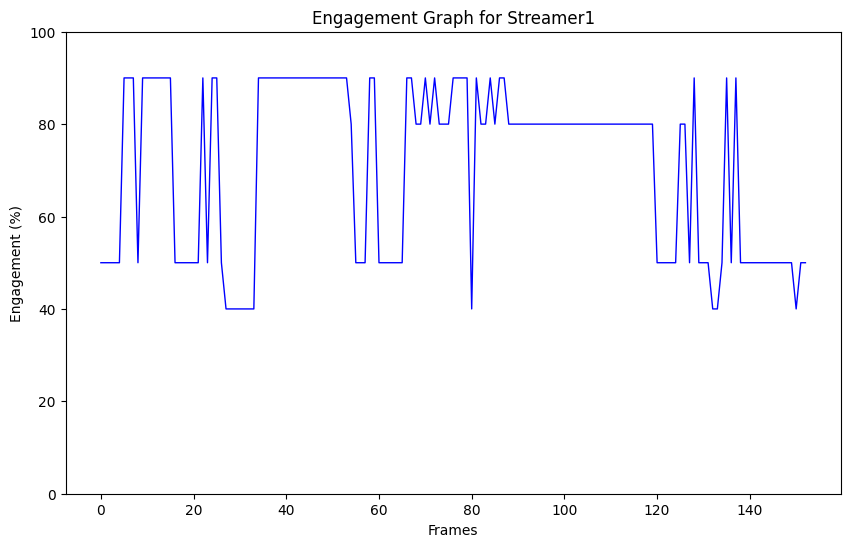

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/

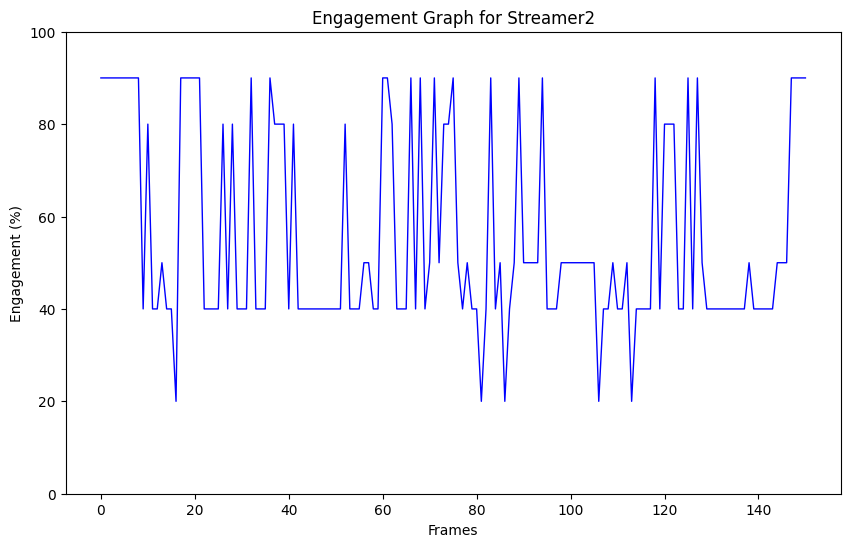

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/

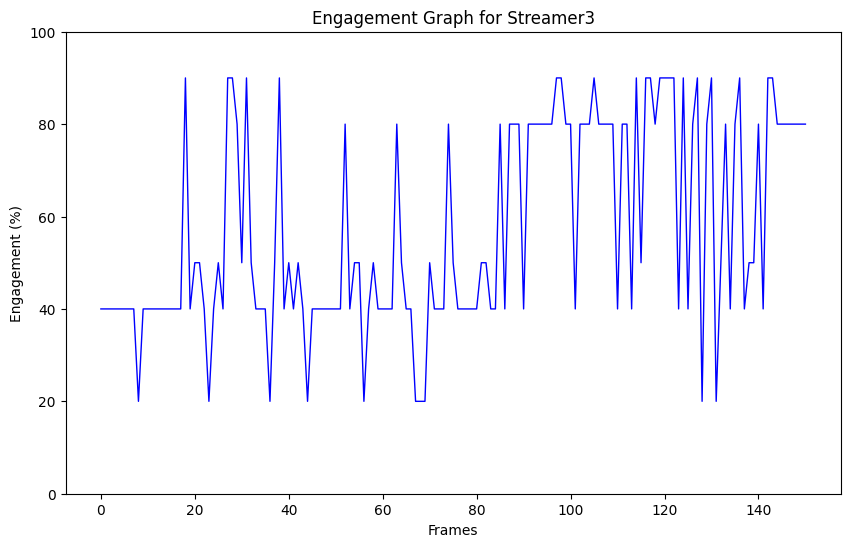

In [ ]:
import numpy as np
import librosa
import shutil
import os
import glob
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import load_model

# Load both models
audio_model = load_model('/content/cnn_model.h5')  # Audio model
facial_model = load_model('/content/model.h5')     # Facial emotion model

# Emotion weights for engagement calculation
emotion_weights = {
    'happy': 0.8,
    'surprise': 0.9,
    'fear': 0.5,
    'sad': 0.4,
    'angry': 0.5,
    'disgust': 0.4,
    'neutral': 0.2
}

# Audio feature extraction function
def extract_mfcc(file_path, sr=22050, n_mfcc=40):
    y, sr = librosa.load(file_path, sr=sr, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfccs.T, axis=0)

# Copy photo helper function
def copy_photo(source_path, dest_path='/content/photo.jpg'):
    shutil.copyfile(source_path, dest_path)
    return dest_path

# Function to check if the audio contains speech or silence
def is_speech_in_audio(file_path, threshold=0.005):
    y, sr = librosa.load(file_path, sr=None)
    rmse = librosa.feature.rms(y=y)[0]
    return np.mean(rmse) > threshold

# Perform decision-level fusion
def decision_fusion(audio_file_path, image_file_path):
    # Audio model prediction
    mfcc_features = extract_mfcc(audio_file_path)
    mfcc_features_reshaped = np.expand_dims(np.expand_dims(mfcc_features, axis=0), axis=2)
    audio_prediction = audio_model.predict(mfcc_features_reshaped)

    # Map 'calm' to 'neutral'
    emotion_labels = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'sad', 5: 'surprise', 6: 'neutral'}
    predicted_emotion_audio = np.argmax(audio_prediction) + 1
    if predicted_emotion_audio == 2:
        predicted_emotion_audio = 6
    elif predicted_emotion_audio == 1:
        predicted_emotion_audio = 6
    elif predicted_emotion_audio == 5:
        predicted_emotion_audio = 0
    elif predicted_emotion_audio == 6:
        predicted_emotion_audio = 2
    elif predicted_emotion_audio == 7:
        predicted_emotion_audio = 1
    elif predicted_emotion_audio == 8:
        predicted_emotion_audio = 5

    # Facial model prediction
    copy_photo(source_path=image_file_path)
    img = image.load_img('/content/photo.jpg', color_mode="grayscale", target_size=(48, 48))
    x = np.expand_dims(image.img_to_array(img) / 255.0, axis=0)
    facial_prediction = facial_model.predict(x)

    # Check and ensure both predictions have the same shape
    if audio_prediction.shape != facial_prediction.shape:
        print(f"Shape mismatch: audio {audio_prediction.shape}, facial {facial_prediction.shape}")
        min_len = min(audio_prediction.shape[1], facial_prediction.shape[1])
        audio_prediction = audio_prediction[:, :min_len]
        facial_prediction = facial_prediction[:, :min_len]

    # Decision-level fusion
    weight_audio, weight_facial = (0.4, 0.6) if is_speech_in_audio(audio_file_path) else (0.0, 1.0)
    combined_probs = weight_audio * audio_prediction[0] + weight_facial * facial_prediction[0]
    final_predicted_class = np.argmax(combined_probs)

    return emotion_labels[final_predicted_class]

# Calculate engagement score based on predicted emotions
def calculate_engagement_scores(predicted_emotions):
    return [emotion_weights[emotion] * 100 for emotion in predicted_emotions]

# Plot engagement over frames for a single streamer
def plot_engagement_graph(streamer_name, engagement_scores):
    plt.figure(figsize=(10, 6))
    plt.plot(engagement_scores, color='blue', linewidth=1)
    plt.title(f'Engagement Graph for {streamer_name}')
    plt.xlabel('Frames')
    plt.ylabel('Engagement (%)')
    plt.ylim(0, 100)
    plt.show()

# Load audio and image data for each streamer and calculate engagement
def load_and_run_model_multiple_streamers():
    streamer_paths = {
        'Streamer1': ('/content/drive/MyDrive/Audio_Datasets/Jack_Clip2_AudioDataset', '/content/drive/MyDrive/imagesss/Jack_2'),
        'Streamer2': ('/content/drive/MyDrive/Audio_Datasets/Ryan_Clip2_AudioDataset', '/content/drive/MyDrive/imagesss/Streamer5_2'),
        'Streamer3': ('/content/drive/MyDrive/Audio_Datasets/Kastaclysm_Clip2_AudioDataset', '/content/drive/MyDrive/imagesss/CLip2')
    }

    for streamer, (audio_dir, image_dir) in streamer_paths.items():
        audio_clips = sorted(glob.glob(os.path.join(audio_dir, '*.mp3')))
        image_frames = sorted(glob.glob(os.path.join(image_dir, '*.jpg')))

        predicted_emotions = []

        # Process each segment of audio and corresponding image frames
        for audio_file, image_file in zip(audio_clips, image_frames):
            predicted_emotion = decision_fusion(audio_file, image_file)
            predicted_emotions.append(predicted_emotion)

        # Calculate engagement scores for this streamer
        engagement_scores = calculate_engagement_scores(predicted_emotions)

        # Plot engagement graph for the streamer
        plot_engagement_graph(streamer, engagement_scores)

# Run the function
load_and_run_model_multiple_streamers()


In [ ]:
import numpy as np
import glob
import shutil
import librosa
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load both models
audio_model = load_model('/content/cnn_model.h5')  # Audio model
facial_model = load_model('/content/model.h5')     # Facial emotion model

# Audio feature extraction function
def extract_mfcc(file_path, sr=22050, n_mfcc=40):
    y, sr = librosa.load(file_path, sr=sr, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfccs.T, axis=0)

# Copy photo helper function
def copy_photo(source_path, dest_path='/content/photo.jpg'):
    shutil.copyfile(source_path, dest_path)
    return dest_path

# Function to check if the audio contains speech or silence
def is_speech_in_audio(file_path, threshold=0.005):
    y, sr = librosa.load(file_path, sr=None)
    rmse = librosa.feature.rms(y=y)[0]
    return np.mean(rmse) > threshold

# Perform decision-level fusion
def decision_fusion(audio_file_path, image_file_path):
    # Audio model prediction
    mfcc_features = extract_mfcc(audio_file_path)
    mfcc_features_reshaped = np.expand_dims(np.expand_dims(mfcc_features, axis=0), axis=2)
    audio_prediction = audio_model.predict(mfcc_features_reshaped)

    # Map 'calm' to 'neutral'
    emotion_labels = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'sad', 5: 'surprise', 6: 'neutral'}
    predicted_emotion_audio = np.argmax(audio_prediction)
    if predicted_emotion_audio == 2:
        predicted_emotion_audio = 6

    # Facial model prediction
    copy_photo(source_path=image_file_path)
    img = image.load_img('/content/photo.jpg', color_mode="grayscale", target_size=(48, 48))
    x = np.expand_dims(image.img_to_array(img) / 255.0, axis=0)
    facial_prediction = facial_model.predict(x)

    # Check and ensure both predictions have the same shape
    if audio_prediction.shape != facial_prediction.shape:
        min_len = min(audio_prediction.shape[1], facial_prediction.shape[1])
        audio_prediction = audio_prediction[:, :min_len]
        facial_prediction = facial_prediction[:, :min_len]

    # Decision-level fusion
    weight_audio, weight_facial = (0.4, 0.6) if is_speech_in_audio(audio_file_path) else (0.0, 1.0)
    combined_probs = weight_audio * audio_prediction[0] + weight_facial * facial_prediction[0]
    final_predicted_class = np.argmax(combined_probs)
    return emotion_labels[final_predicted_class]

# Load audio and image data for each streamer
def load_and_run_model_multiple_streamers():
    streamer_paths = {
        'Streamer1': ('/content/drive/MyDrive/Audio_Datasets/Jack_Clip2_AudioDataset', '/content/drive/MyDrive/imagesss/Jack_2'),
        'Streamer2': ('/content/drive/MyDrive/Audio_Datasets/Ryan_Clip2_AudioDataset', '/content/drive/MyDrive/imagesss/Streamer5_2'),
        'Streamer3': ('/content/drive/MyDrive/Audio_Datasets/Kastaclysm_Clip2_AudioDataset', '/content/drive/MyDrive/imagesss/CLip2')
    }

    # Dictionary to store emotions over time for each streamer
    streamer_data = {}

    for clip_idx, (streamer, (audio_dir, image_dir)) in enumerate(streamer_paths.items(), start=1):
        clip_id = f"clip_{clip_idx}"
        streamer_data[streamer] = {clip_id: []}

        audio_clips = sorted(glob.glob(os.path.join(audio_dir, '*.mp3')))
        all_image_frames = sorted(glob.glob(os.path.join(image_dir, '*.jpg')))

        frames_per_segment = 3
        image_frames_by_segment = [all_image_frames[i:i+frames_per_segment] for i in range(0, len(all_image_frames), frames_per_segment)]

        # Iterate over audio clips and image segments
        for audio_clip, image_frames in zip(audio_clips, image_frames_by_segment):
            segment_emotions = []  # Store emotions of each segment

            # Process each 3-second segment within the clip
            for img in image_frames:
                emotion = decision_fusion(audio_clip, img)
                segment_emotions.append(emotion)

            streamer_data[streamer][clip_id].append(segment_emotions)

    # Print or further process streamer_data
    print(streamer_data)
    return streamer_data

# Calculate engagement scores for streamers
def calculate_engagement_score(streamer_data, emotion_weights):
    streamer_engagement_scores = {}
    total_engagement_scores = []

    # Loop through each streamer
    for streamer_id, clips in streamer_data.items():
        clip_scores = []  # Engagement scores for each clip of this streamer

        # Store emotions for each segment within each clip
        for clip_id, segments in clips.items():
            segment_emotions = []  # Emotions for each segment within a clip

            # Gather emotions for each segment
            for segment in segments:
                segment_emotions.extend(segment)

            # Calculate engagement score for each segment's emotions
            clip_score = sum(emotion_weights[emotion] for emotion in segment_emotions) / len(segment_emotions)
            clip_scores.append(clip_score)

        # Average engagement score for this streamer across their clips
        streamer_average_score = sum(clip_scores) / len(clip_scores)
        streamer_engagement_scores[streamer_id] = streamer_average_score
        total_engagement_scores.extend(clip_scores)  # Collect all clip scores for overall average

    # Overall engagement score across all streamers
    overall_engagement_score = sum(total_engagement_scores) / len(total_engagement_scores)

    return streamer_engagement_scores, overall_engagement_score

# Example usage
emotion_weights = {'angry': 1.0, 'disgust': 0.5, 'fear': 0.8, 'happy': 2.0, 'sad': 0.7, 'surprise': 1.5, 'neutral': 1.0}
streamer_data = load_and_run_model_multiple_streamers()
streamer_scores, overall_score = calculate_engagement_score(streamer_data, emotion_weights)

print("Individual Streamer Engagement Scores:", streamer_scores)
print("Overall Engagement Score:", overall_score)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━

In [ ]:
!pip install resampy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 22.7 MB/s eta 0:00:00


In [ ]:
!pip install librosa

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import librosa
import shutil
import os
import glob
from tensorflow.keras.preprocessing import image

# Load both models
audio_model = load_model('/content/cnn_model.h5')  # Audio model
facial_model = load_model('/content/model.h5')     # Facial emotion model

# Audio feature extraction function
def extract_mfcc(file_path, sr=22050, n_mfcc=40):
    y, sr = librosa.load(file_path, sr=sr, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfccs.T, axis=0)

# Copy photo helper function
def copy_photo(source_path, dest_path='/content/photo.jpg'):
    shutil.copyfile(source_path, dest_path)
    return dest_path

# Function to check if the audio contains speech or silence
def is_speech_in_audio(file_path, threshold=0.005):
    y, sr = librosa.load(file_path, sr=None)
    rmse = librosa.feature.rms(y=y)[0]
    return np.mean(rmse) > threshold

# Perform decision-level fusion
def decision_fusion(audio_file_path, image_file_path):
    # Audio model prediction
    mfcc_features = extract_mfcc(audio_file_path)
    mfcc_features_reshaped = np.expand_dims(np.expand_dims(mfcc_features, axis=0), axis=2)
    audio_prediction = audio_model.predict(mfcc_features_reshaped)

    # Map 'calm' to 'neutral'
    emotion_labels = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'sad', 5: 'surprise', 6: 'neutral'}
    predicted_emotion_audio = np.argmax(audio_prediction)
    if predicted_emotion_audio == 2:
        predicted_emotion_audio = 6

    # Facial model prediction
    copy_photo(source_path=image_file_path)
    img = image.load_img('/content/photo.jpg', color_mode="grayscale", target_size=(48, 48))
    x = np.expand_dims(image.img_to_array(img) / 255.0, axis=0)
    facial_prediction = facial_model.predict(x)

    # Check and ensure both predictions have the same shape
    if audio_prediction.shape != facial_prediction.shape:
        print(f"Shape mismatch: audio {audio_prediction.shape}, facial {facial_prediction.shape}")

        # Resize or trim to match the smaller size
        min_len = min(audio_prediction.shape[1], facial_prediction.shape[1])
        audio_prediction = audio_prediction[:, :min_len]
        facial_prediction = facial_prediction[:, :min_len]

    # Decision-level fusion
    weight_audio, weight_facial = (0.4, 0.6) if is_speech_in_audio(audio_file_path) else (0.0, 1.0)
    combined_probs = weight_audio * audio_prediction[0] + weight_facial * facial_prediction[0]
    final_predicted_class = np.argmax(combined_probs)
    return emotion_labels[final_predicted_class]

# Load audio and image data for each streamer
def load_and_run_model_multiple_streamers():
    streamer_paths = {
        'Streamer1': ('/content/drive/MyDrive/Audio_Datasets/Jack_Clip2_AudioDataset', '/content/drive/MyDrive/imagesss/Jack_2'),
        'Streamer2': ('/content/drive/MyDrive/Audio_Datasets/Ryan_Clip2_AudioDataset', '/content/drive/MyDrive/imagesss/Streamer5_2'),
        # 'Streamer3': ('/content/drive/MyDrive/EditedAudioDataset', '/content/drive/MyDrive/Streamer3_Faces (1)')
    }

    # Dictionary to store emotions over time for each streamer
    streamer_data = {}

    for streamer, (audio_dir, image_dir) in streamer_paths.items():
        streamer_data[streamer] = {}

        audio_clips = sorted(glob.glob(os.path.join(audio_dir, '*.mp3')))
        all_image_frames = sorted(glob.glob(os.path.join(image_dir, '*.jpg')))

        frames_per_segment = 3
        image_frames_by_segment = [all_image_frames[i:i+frames_per_segment] for i in range(0, len(all_image_frames), frames_per_segment)]

        # Iterate over audio clips and image segments
        for segment_idx, (audio_clip, image_frames) in enumerate(zip(audio_clips, image_frames_by_segment), start=1):
            clip_id = f"clip_{segment_idx}"
            streamer_data[streamer][clip_id] = []

            # Process each 3-second segment within the clip
            for img in image_frames:
                emotion = decision_fusion(audio_clip, img)
                streamer_data[streamer][clip_id].append(emotion)

    # Print or further process streamer_data
    print(streamer_data)
    # Optional: Return streamer_data if you want to use it outside the function
    return streamer_data

# Run the function
streamer_data = load_and_run_model_multiple_streamers()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Shape mismatch: audio (1, 8), facial (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


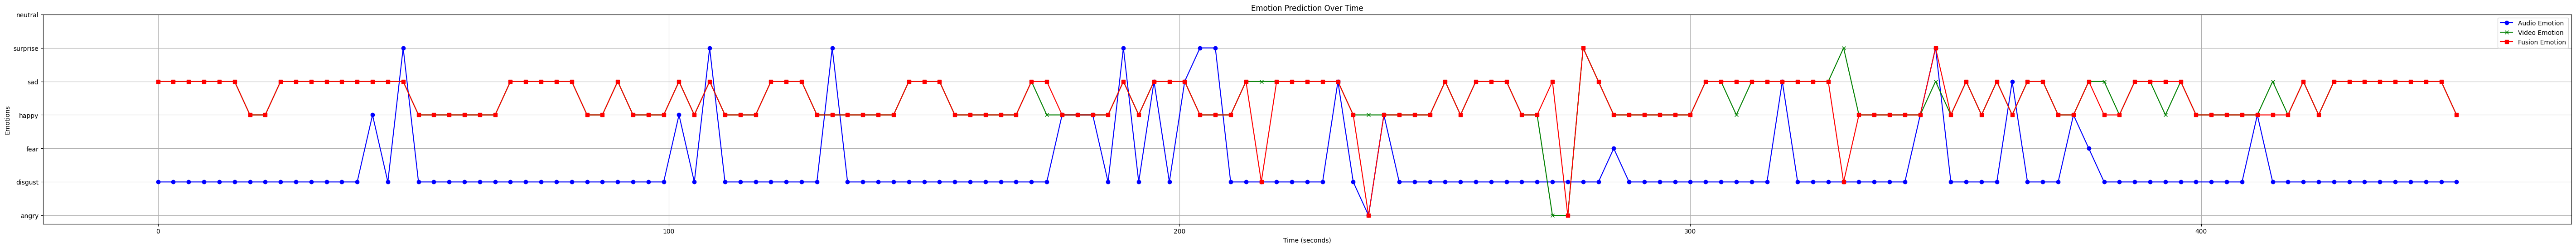

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_emotions_from_excel(excel_file):
    # Step 1: Load the data from the Excel sheet
    df = pd.read_excel(excel_file)

    # Step 2: Define emotion labels and assign them numerical values for the y-axis
    emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    emotion_to_value = {emotion: idx for idx, emotion in enumerate(emotion_labels)}

    # Step 3: Convert emotions to numeric values for plotting
    df['audio_emotion_value'] = df['audio_emotion_predicted'].map(emotion_to_value)
    df['video_emotion_value'] = df['video_emotion_predicted'].map(emotion_to_value)
    df['fusion_emotion_value'] = df['fusion_emotion_predicted'].map(emotion_to_value)

    # Step 4: Plot the emotions
    plt.figure(figsize=(72, 6))  # Make the figure 6 times wider (6 * 12 = 72)

    # Plot audio emotions
    plt.plot(df['start_time'], df['audio_emotion_value'], label='Audio Emotion', marker='o', color='b')

    # Plot video emotions
    plt.plot(df['start_time'], df['video_emotion_value'], label='Video Emotion', marker='x', color='g')

    # Plot fusion emotions
    plt.plot(df['start_time'], df['fusion_emotion_value'], label='Fusion Emotion', marker='s', color='r')

    # Step 5: Customize the plot
    plt.yticks(range(len(emotion_labels)), emotion_labels)  # Set y-axis labels as emotion names
    plt.xlabel('Time (seconds)')
    plt.ylabel('Emotions')
    plt.title('Emotion Prediction Over Time')
    plt.legend(loc='upper right')
    plt.grid(True)

    # Step 6: Display the plot
    plt.show()


# Example usage
excel_file_path = '/content/Final_Output_Kastaclysm_Clip2.xlsx'
plot_emotions_from_excel(excel_file_path)

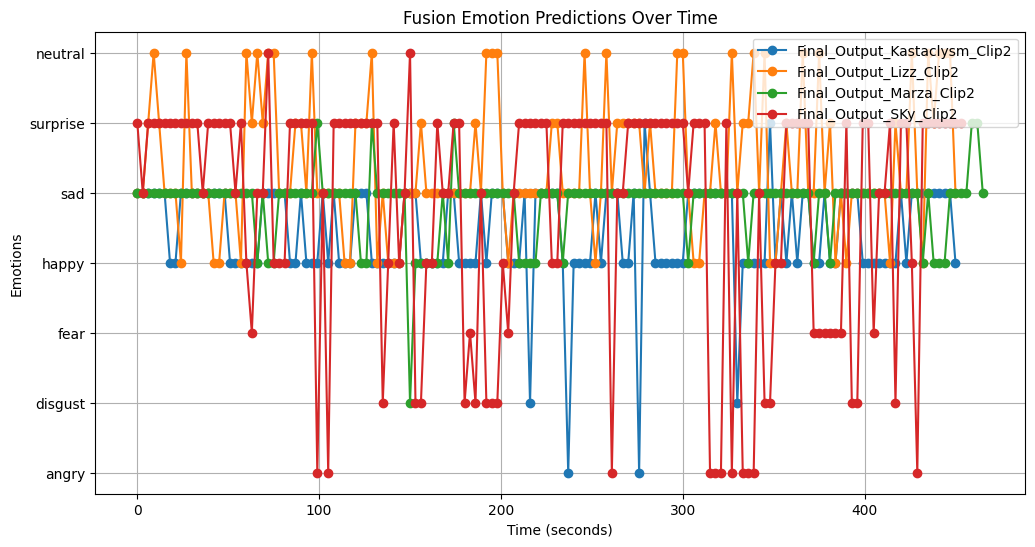

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_fusion_emotions_multiple_files(excel_files):
    # Step 1: Define emotion labels and assign them numerical values for the y-axis
    emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    emotion_to_value = {emotion: idx for idx, emotion in enumerate(emotion_labels)}

    plt.figure(figsize=(12, 6))  # Set figure size for better visibility

    # Step 2: Process each Excel file
    for excel_file in excel_files:
        # Load data from the Excel sheet
        df = pd.read_excel(excel_file)

        # Convert fusion emotions to numeric values for plotting
        df['fusion_emotion_value'] = df['fusion_emotion_predicted'].map(emotion_to_value)

        # Extract clip/stream name from file path for labeling
        clip_name = excel_file.split("/")[-1].replace(".xlsx", "")

        # Plot fusion emotions over time
        plt.plot(df['start_time'], df['fusion_emotion_value'], label=clip_name, marker='o')

    # Step 3: Customize the plot
    plt.yticks(range(len(emotion_labels)), emotion_labels)  # Set y-axis labels as emotion names
    plt.xlabel('Time (seconds)')
    plt.ylabel('Emotions')
    plt.title('Fusion Emotion Predictions Over Time')
    plt.legend(loc='upper right')
    plt.grid(True)

    # Step 4: Display the plot
    plt.show()

# Example usage
excel_file_paths = [
    '/content/Final_Output_Kastaclysm_Clip2.xlsx',
    '/content/Final_Output_Lizz_Clip2.xlsx',
    '/content/Final_Output_Marza_Clip2.xlsx',
    '/content/Final_Output_SKy_Clip2.xlsx'
]
plot_fusion_emotions_multiple_files(excel_file_paths)


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Define emotion labels and mapping
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
emotion_to_index = {label: idx for idx, label in enumerate(emotion_labels)}

# List of Excel files
excel_files = [
    '/content/Final_Output_Kastaclysm_Clip6.xlsx',
    '/content/Final_Output_Lizz_Clip6.xlsx',
    '/content/Final_Output_Marza_Clip3.xlsx',
    '/content/Final_Output_SKy_Clip3.xlsx'
]  # Replace with your actual file paths

# Initialize a Plotly figure
fig = go.Figure()

# Process each Excel file
for file_path in excel_files:
    # Load the Excel sheet into a DataFrame
    data = pd.read_excel(file_path)

    # Extract streamer name from file name (optional)
    streamer_name = file_path.split("/")[-1].replace(".xlsx", "")  # Adjust based on file name format

    # Prepare data for plotting
    time_intervals = data['start_time']
    final_emotions = data['final_emotion'].apply(lambda x: emotion_to_index[x])

    # Add data to the plot
    fig.add_trace(go.Scatter(
        x=time_intervals,
        y=final_emotions,
        mode='lines+markers',
        name=streamer_name,  # Use streamer name or file name
        marker=dict(size=8),
        line=dict(width=2)
    ))

# Customize layout
fig.update_layout(
    title="Emotions Over Time for Multiple Clips",
    xaxis_title="Time (Start Time in Seconds)",
    yaxis=dict(
        tickmode='array',
        tickvals=list(emotion_to_index.values()),
        ticktext=emotion_labels,
        title="Predicted Emotion"
    ),
    legend_title="Clips/Streams",
    template="plotly_white"
)

# Show the plot
fig.show()


Plotting engagement graph for streamer: Sheet1


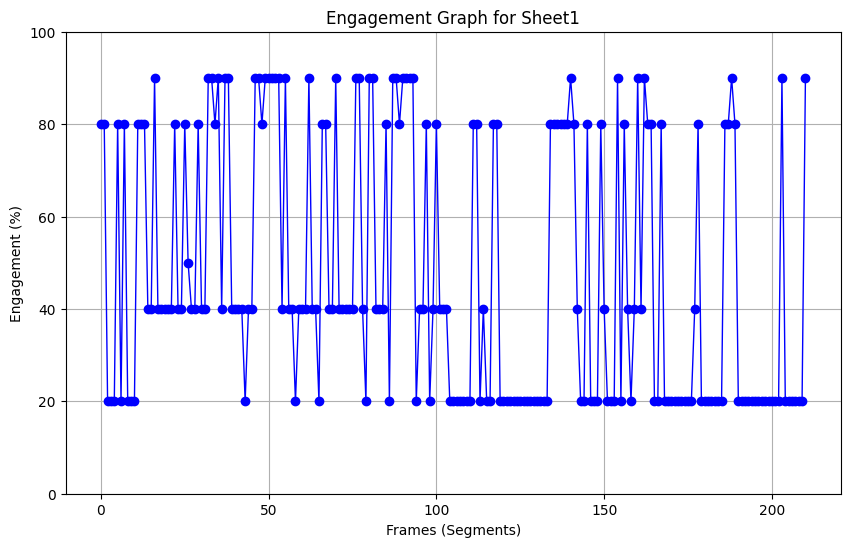

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Emotion weights for engagement calculation
emotion_weights = {
    'happy': 0.4,
    'surprise': 0.9,
    'fear': 0.5,
    'sad': 0.8,
    'angry': 0.8,
    'disgust': 0.4,
    'neutral': 0.2
}

# Function to calculate engagement scores based on predicted emotions
def calculate_engagement_scores(predicted_emotions):
    """
    Calculate engagement scores for a list of predicted emotions.
    Args:
    - predicted_emotions (list of str): List of final emotions.

    Returns:
    - list of float: Engagement scores (scaled to 0-100).
    """
    return [emotion_weights.get(emotion, 0) * 100 for emotion in predicted_emotions]

# Function to plot engagement graph for a streamer
def plot_engagement_graph(streamer_name, engagement_scores):
    """
    Plot engagement graph for a given streamer.
    Args:
    - streamer_name (str): Name of the streamer.
    - engagement_scores (list of float): Engagement scores.

    Returns:
    - None (Displays the plot).
    """
    plt.figure(figsize=(10, 6))
    plt.plot(engagement_scores, color='blue', marker='o', linewidth=1)
    plt.title(f'Engagement Graph for {streamer_name}')
    plt.xlabel('Frames (Segments)')
    plt.ylabel('Engagement (%)')
    plt.ylim(0, 100)
    plt.grid(True)
    plt.show()

# Function to process emotions from an Excel file with multiple sheets
def load_and_process_emotions_from_excel(excel_file):
    """
    Load and process emotion data from an Excel file containing multiple sheets.
    Args:
    - excel_file (str): Path to the Excel file.

    Returns:
    - None (Processes and plots engagement graphs).
    """
    try:
        # Load all sheets from the Excel file
        excel_data = pd.read_excel(excel_file, sheet_name=None)

        for sheet_name, data in excel_data.items():
            if 'final_emotion' not in data.columns:
                print(f"Skipping sheet '{sheet_name}': 'final_emotion' column not found.")
                continue

            # Extract the final emotions
            final_emotions = data['final_emotion'].dropna().tolist()

            # Calculate engagement scores
            engagement_scores = calculate_engagement_scores(final_emotions)

            # Plot the engagement graph
            print(f"Plotting engagement graph for streamer: {sheet_name}")
            plot_engagement_graph(sheet_name, engagement_scores)

    except Exception as e:
        print(f"Error processing the Excel file: {e}")

# Example usage
excel_file_path = '/content/Final_Output_SKy_Clip6.xlsx'  # Update with the actual path
load_and_process_emotions_from_excel(excel_file_path)
